# Done with SKARAB

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev661+master.49bf3f1
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2789+master.3d2aaf0


In [4]:
h5_filename = '/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/04/04/1522861640.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/04/04/1522861640.h5


In [5]:
run -i /var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py -h

Usage: analyse_interferometric_pointing.py [opts] <HDF5 file>

This processes an HDF5 dataset and extracts fitted beam parameters from the
compound scans in it.

Options:
  -h, --help            show this help message and exit
  -a ANTS, --ants=ANTS  List of antennas to use in the reduction default is
                        all antennas in the data set
  --exclude-ants=EX_ANTS
                        List of antennas to exculde from the reduction default
                        is None of the antennas in the data set
  -c CHANNEL_MASK, --channel-mask=CHANNEL_MASK
                        Optional pickle file with boolean array specifying
                        channels to mask (default is no mask)
  -o OUTFILEBASE, --output=OUTFILEBASE
                        Base name of output files (*.csv for output data and
                        *.log for messages, default is
                        '<dataset_name>_interferometric_pointing')


In [9]:
run -i /var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py \
-c /var/kat/katsdpscripts/RTS/rfi_mask.pickle  --exclude-ants='m046' $h5_filename

DEBUG: Found int_time=0.9995771214 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1522829391.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added 'PKS 0237-233' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0252-712' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0407-658' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0410-752' [radec] (and 0 aliases)
DEBUG: Added '3C138' [radec] (and 1 aliases)
DEBUG: Added 'PKS 0637-752' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0741-063' [radec] (and 0 aliases)
DEBUG: Added 'PKS 0823-500' [radec] (and 0 aliases)
DEBUG: Added '3C237' [radec] (and 1 aliases)
DEBUG: Added 'PKS 1127-145' [radec] (and 0 aliases)
DEBUG: Added '3C279' [radec] (and 1 aliases)
DEBUG: Added 'PKS 1421-490' [rad

/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


DEBUG: Sensor u'Antennas/m053/pos_actual_scan_elev' has duplicate timestamps with different values
DEBUG: At 2018-04-05 00:00:03.136 UTC, sensor u'Antennas/m053/pos_actual_scan_elev' has values of 23.5032451743 and 23.503245216 - keeping last one


/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/var/kat/katsdpscripts/reduction/analyse_interferometric_pointing.py:88: RuntimeWarning: divide by zero encountered in divide
  y_err = 1./np.sqrt(np.array(stdv[pol])[:,freq,:][:,rfi,ant].sum(axis=1))


Valid data obtained from the Compound scan
Compound scan 1 of field PKS 0252-712 
Valid data obtained from the Compound scan
Compound scan 2 of field PKS 0407-658 
Valid data obtained from the Compound scan
Compound scan 3 of field PKS 0407-658 
Valid data obtained from the Compound scan
Compound scan 4 of field 3C138 
Valid data obtained from the Compound scan
Compound scan 5 of field PKS 0637-752 
Valid data obtained from the Compound scan
Compound scan 6 of field PKS 0741-063 
Valid data obtained from the Compound scan
Compound scan 7 of field PKS 0823-500 
Valid data obtained from the Compound scan
Compound scan 8 of field 3C237 
Valid data obtained from the Compound scan
Compound scan 9 of field PKS 1127-145 
Valid data obtained from the Compound scan
Compound scan 10 of field 3C279 
Valid data obtained from the Compound scan
Compound scan 11 of field 3C279 
Valid data obtained from the Compound scan
Compound scan 12 of field PKS 0252-712 
Valid data obtained from the Compound sca

In [10]:
tmp = h5_filename.split('/')[-1].split('.')[0]
gl = glob.glob("%s*.csv"%tmp)

In [11]:
print h5.antlist

['m011', 'm021', 'm041', 'm043', 'm045', 'm048', 'm053']


In [12]:
!pwd
for g in sorted(gl):
    print g

/data/Pointing/Interferometric
1522861640_interferometric_pointing_m011.csv
1522861640_interferometric_pointing_m021.csv
1522861640_interferometric_pointing_m041.csv
1522861640_interferometric_pointing_m043.csv
1522861640_interferometric_pointing_m045.csv
1522861640_interferometric_pointing_m048.csv
1522861640_interferometric_pointing_m053.csv


# Delete wildly discepant points

In [13]:
#!sed -i /Nothing/d 1516731881*.csv

In [14]:
#!sed -i /2018-01-27\ 15:/d 1517050827_interferometric_pointing*.csv
#!sed -i /3C138,\ 2018-02-27\ 20:04/d 1519747734_interferometric_pointing*.csv
#!sed -i /1127-145,\ 2018-02-27\ 18:54/d 1519747734_interferometric_pointing*.csv

In [15]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

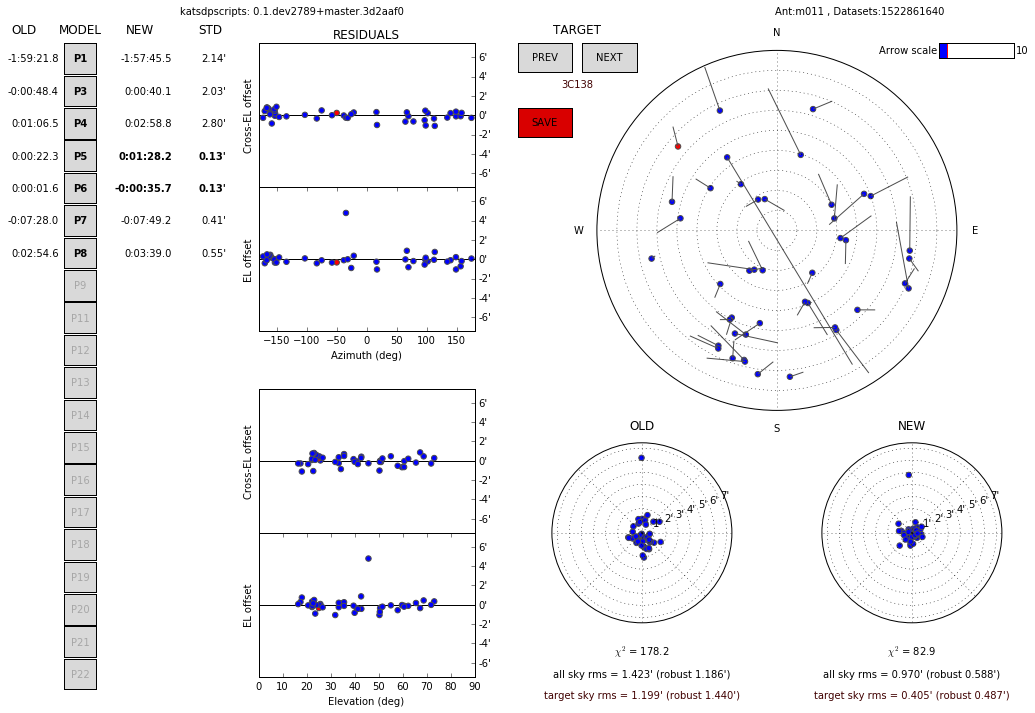

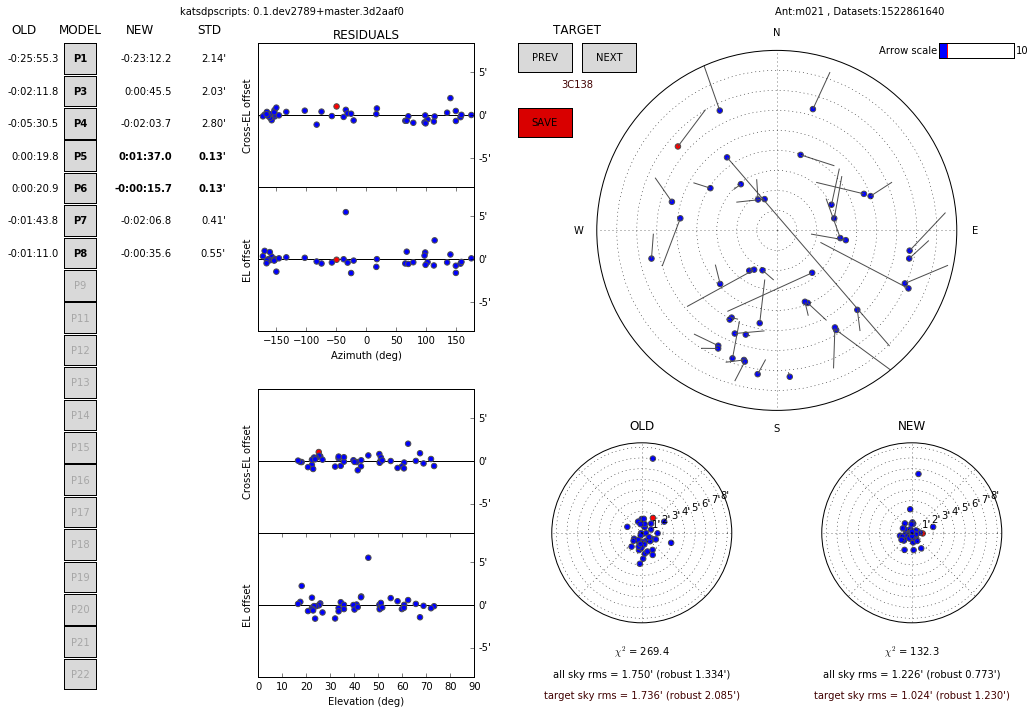

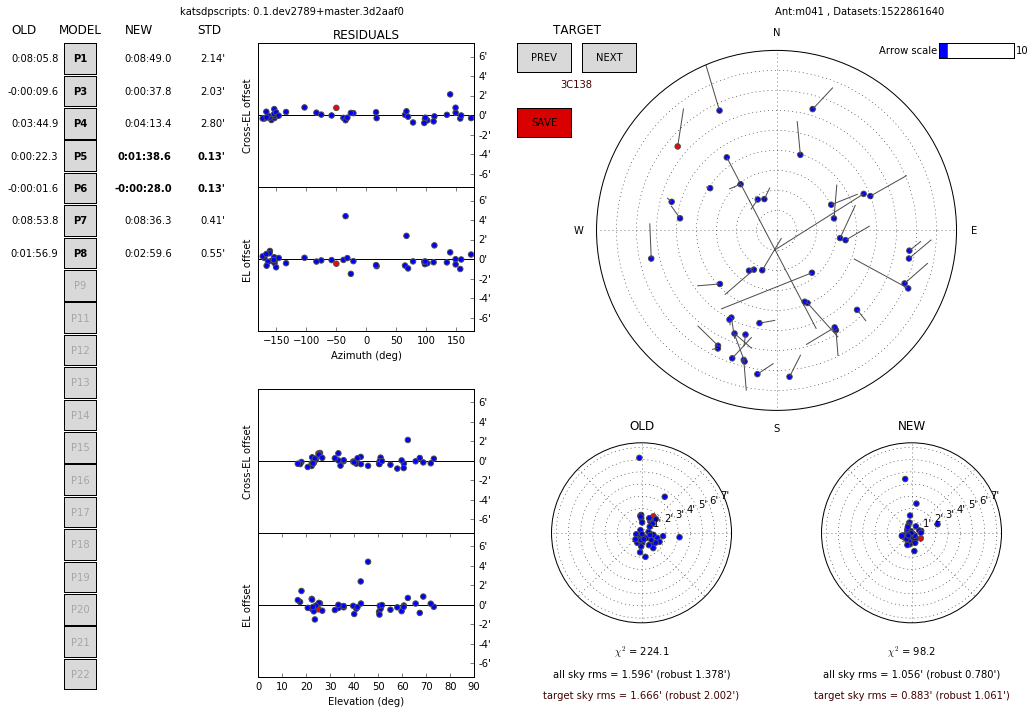

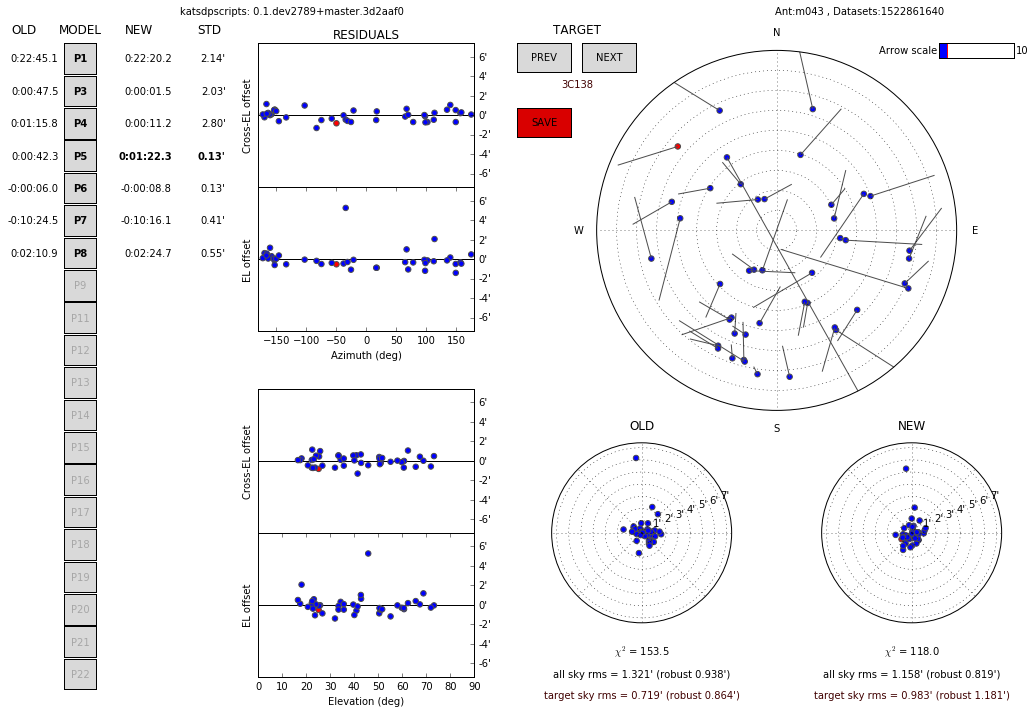

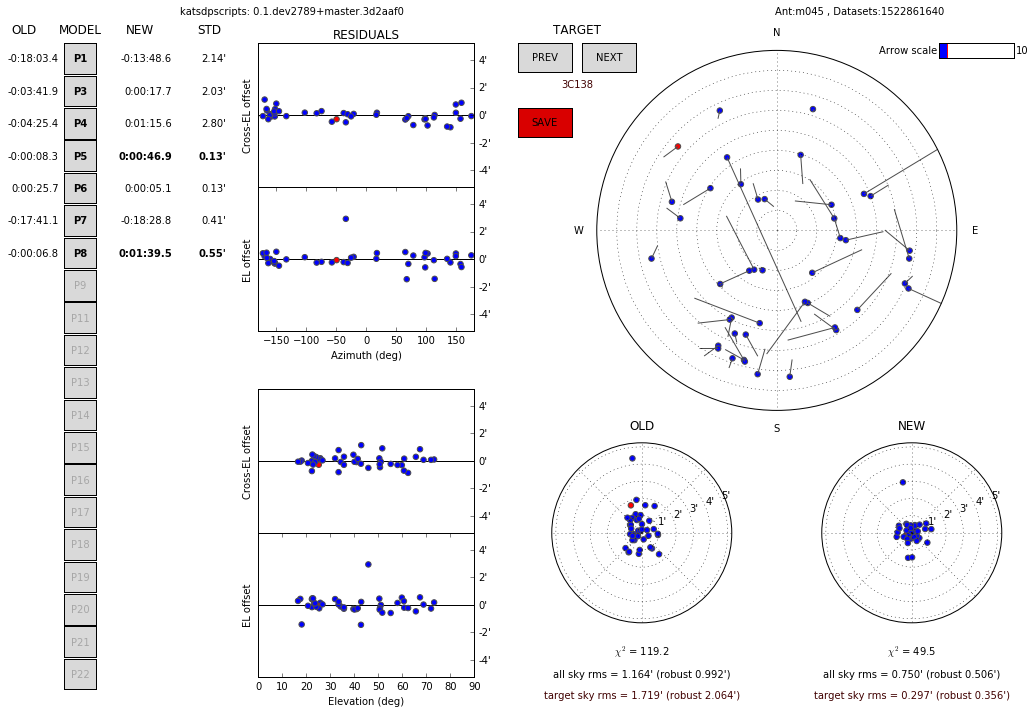

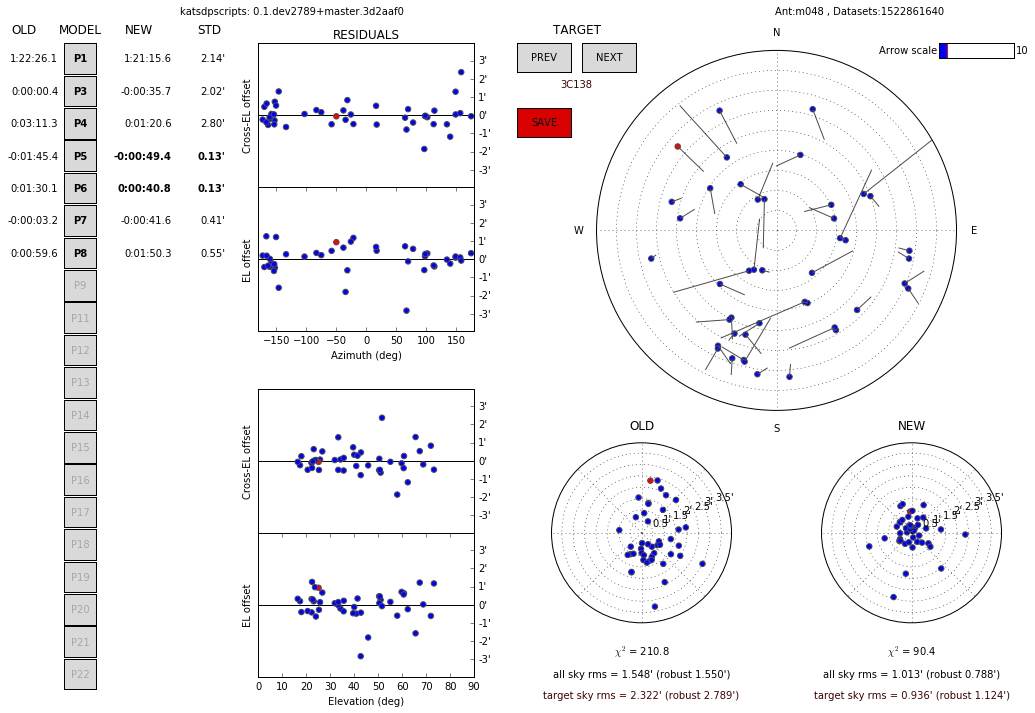

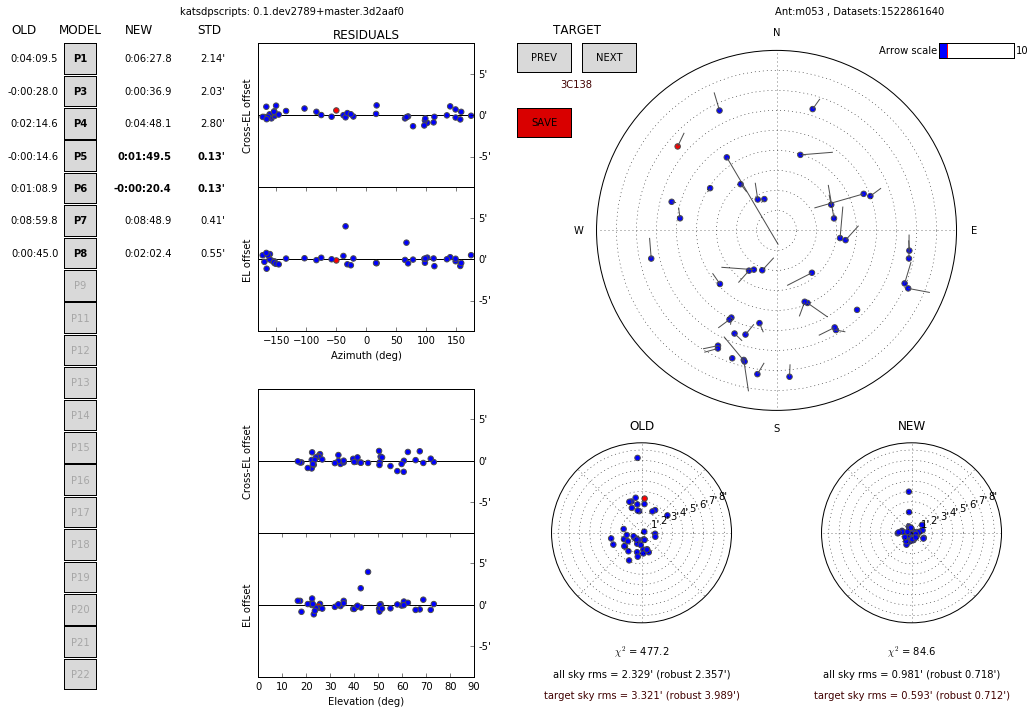

In [16]:
for fl in sorted(gl):
    figure(figsize=[15.0,10.0])
    %run /var/kat/katsdpscripts/reduction/fit_pointing_model.py -m 1.0 $fl
    